In [22]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# looks like sex column is having alphabets so will convert that into numericals

In [5]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

In [6]:
# here converted sex column by numbers
# here 4177 rows and 9 columns are there 

In [7]:
#finding type of variables
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.shape  #shape of dataset

(4177, 9)

In [9]:
df.describe()  # description of dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.isnull().sum()   #cheaking of null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
#Adding age column in the dataframe for classification. Age is classified based on the number of rings.
#Rings 1-8 -->Age 1, denoting young
#Rings 9-10 -->Age 2, denoting middle
#Rings 11-29 -->Age 3, denoting old

In [12]:
def label_race (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings'] >=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [13]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [14]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [15]:
df.Sex = df.Sex.astype(float)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [16]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


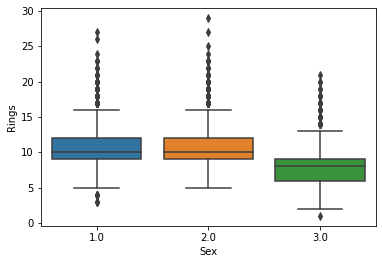

In [17]:
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Sex", y="Rings", data=df)
plt.show()

In [18]:
#Infants have lower number of rings as compared to males and females

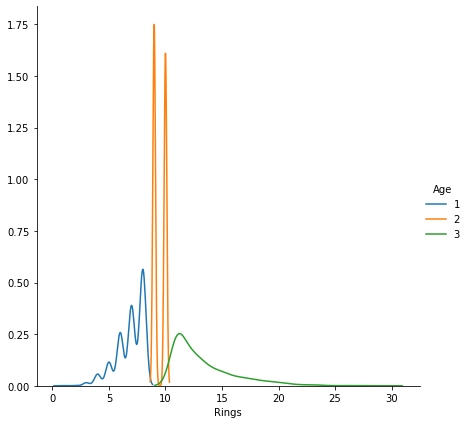

In [23]:
sns.FacetGrid(df, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()
plt.show()

In [20]:
#Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more

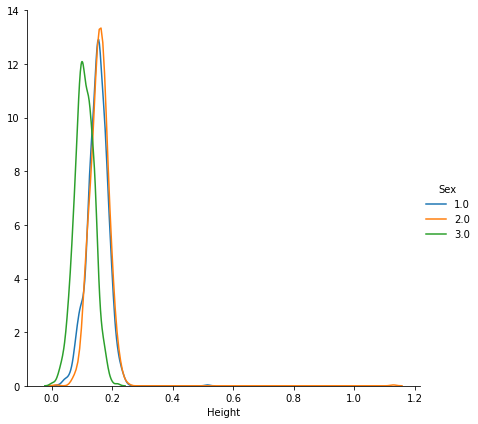

In [24]:
sns.FacetGrid(df, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()

In [25]:
#Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

In [26]:
#Classification
#Response variable is age

In [27]:
Y = df[['Age']]
Y

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [28]:
#Predictor variables obtained by dropping rings and age from the dataframe

In [29]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [30]:
#Plotting correlation matrix

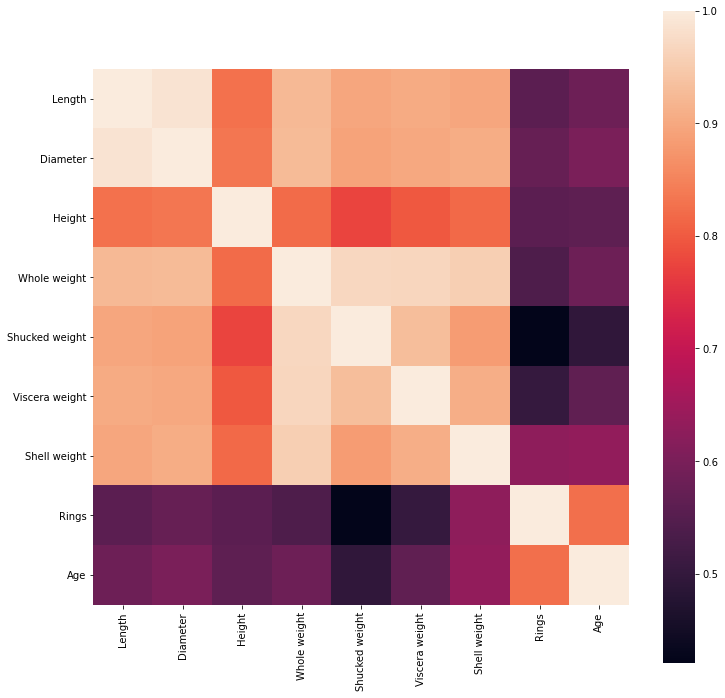

In [31]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

In [32]:
#Seprating my features and labels
X = df.drop(['Rings'], axis = 1)
y = df['Rings']

In [33]:
#Buliding a stats model
import statsmodels.api as sm
 
Xc = sm.add_constant(X)
lr = sm.OLS(y, Xc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1394.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:14:16   Log-Likelihood:                -7914.9
No. Observations:                4177   AIC:                         1.585e+04
Df Residuals:                    4167   BIC:                         1.591e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.0913      0.223      9.362      0.000       1.653       2.529
Sex               -0.0607      0.035     -1.753      0.080      -0.129       0.007
Length             1.8879      1.328      1.421      0.155      -0.716       4.492
Diameter           3.2947      1.636      2.013      0.044       0.086       6.503
Height             6.4832      1.129      5.743      0.000       4.270       8.696
Whole weight       6.0642      0.535     11.337      0.000       5.015       7.113
Shucked weight   -12.1497      0.613    -19.826      0.000     -13.351     -10.948
Viscera weight   -10.2144      0.948    -10.776      0.000     -12.073      -8.356
Shell weight       3.8581      0.830      4.649      0.000       2.231       5.485
Age                2.4818      0.041     60.006      0.000       2.401       2.563
==============================================================================
Omnibus:                     1712.584   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11879.236
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      10.434   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [35]:
#The R squared value is low in the base model, but it should be noted that R squared value being high is not the only measure for a good model. also we need to check 

In [36]:
#Checking VIF for all my features
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,80.255138
Sex,1.322491
Length,40.919217
Diameter,42.415661
Height,3.585784
Whole weight,110.657440
Shucked weight,29.753279
Viscera weight,17.362161
Shell weight,21.465037
Age,1.879742


In [37]:
#Checking VIF By dropping One column
X2 = X.drop(['Whole weight'], axis = 1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index =X2c.columns, columns=['VIF'])

,VIF
const,80.091712
Sex,1.322231
Length,40.915784
Diameter,42.407306
Height,3.585235
Shucked weight,9.433907
Viscera weight,10.798564
Shell weight,8.447028
Age,1.863256


In [38]:
#Checking VIF By dropping Two columns
X2 = X.drop(['Whole weight', 'Diameter'], axis = 1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i ) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,80.068992
Sex,1.317389
Length,8.113302
Height,3.545462
Shucked weight,9.427236
Viscera weight,10.783663
Shell weight,8.175500
Age,1.848163


In [39]:
#Checking VIF By dropping Three columns
X3 = X.drop(['Whole weight','Diameter','Viscera weight'], axis=1)
X3c = sm.add_constant(X3)

vif = [VIF(X3c.values, i) for i in range(X3c.shape[1])]
pd.DataFrame(vif, index=X3c.columns, columns=['VIF'])

,VIF
const,77.934062
Sex,1.314545
Length,7.876538
Height,3.529856
Shucked weight,6.541406
Shell weight,7.441197
Age,1.838673


In [40]:
lr = sm.OLS(y, X3c).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1992.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:15:10   Log-Likelihood:                -7992.3
No. Observations:                4177   AIC:                         1.600e+04
Df Residuals:                    4170   BIC:                         1.604e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1640      0.224      9.654      0.000       1.725       2.603
Sex               -0.0629      0.035     -1.789      0.074      -0.132       0.006
Length             3.8378      0.593      6.467      0.000       2.674       5.001
Height             6.5343      1.141      5.729      0.000       4.298       8.771
Shucked weight    -7.3255      0.293    -25.036      0.000      -7.899      -6.752
Shell weight      10.6347      0.498     21.371      0.000       9.659      11.610
Age                2.5193      0.042     60.481      0.000       2.438       2.601
==============================================================================
Omnibus:                     1865.222   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14594.506
Skew:                           1.955   Prob(JB):                         0.00
Kurtosis:                      11.281   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(lr.resid, X3c)

#The pvalue is 0.6830, so it can be said that the variance of error is constant across the range of data.Dropping the feature with high p-value

(0.8855694515118008, 0.997205603338889, 'increasing')

In [42]:
while len(X3.columns)>0:
    X_c = sm.add_constant(X3)
    mod = sm.OLS(y,X_c).fit()
    f = mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        X3 = X3.drop(f, axis=1)
    else:
        break

print("The final features are:",X3.columns)

The final features are: Index(['Length', 'Height', 'Shucked weight', 'Shell weight', 'Age'], dtype='object')


In [43]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2388.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:15:37   Log-Likelihood:                -7993.9
No. Observations:                4177   AIC:                         1.600e+04
Df Residuals:                    4171   BIC:                         1.604e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9665      0.195     10.078      0.000       1.584       2.349
Length             3.8721      0.593      6.526      0.000       2.709       5.035
Height             6.6302      1.140      5.818      0.000       4.396       8.865
Shucked weight    -7.2743      0.291    -24.974      0.000      -7.845      -6.703
Shell weight      10.6315      0.498     21.359      0.000       9.656      11.607
Age                2.5320      0.041     61.668      0.000       2.451       2.612
==============================================================================
Omnibus:                     1857.891   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14453.506
Skew:                           1.947   Prob(JB):                         0.00
Kurtosis:                      11.239   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 432x288 with 0 Axes>

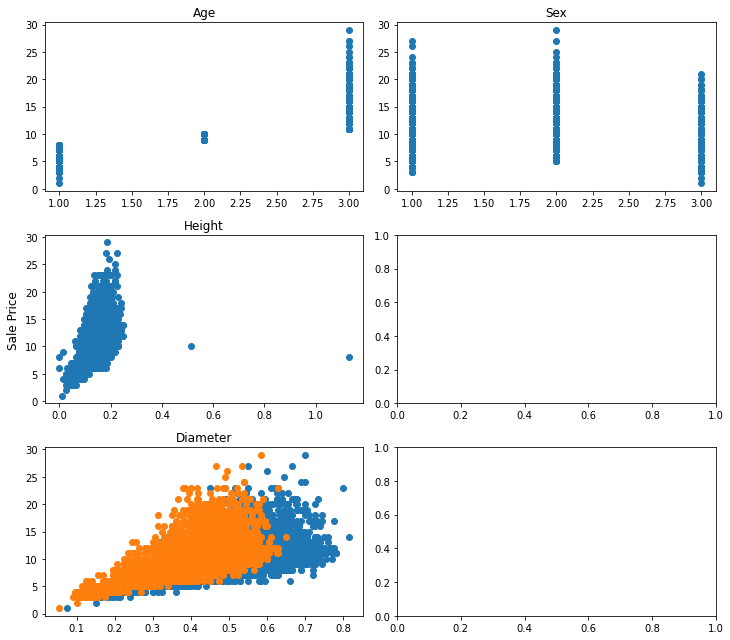

In [44]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [45]:
#Height of abalones is in the range of 0 to 0.2mm, most abalones are old aged

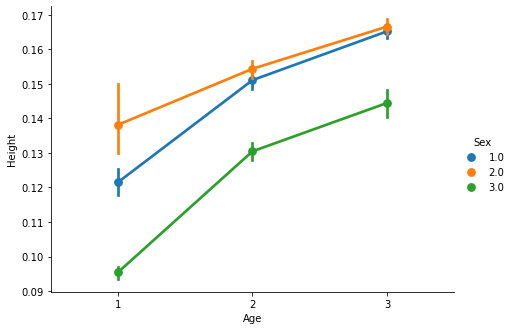

In [46]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)
plt.show()

In [47]:
#Female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm.
#Dividing the dataset into 75% training and 25% test data using train_test_split

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y)

In [49]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

In [50]:
#Function to calculate ROC curve

1.Logistic Regression


In [51]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
#from statsmodels.formula.api import logit, probit, poisson, ols

#logit = sm.Logit(train_y, train_X)
#affair_mod = logit.fit()
#print(affair_mod.summary())
#model = LogisticRegression()

#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 

#calculate ROC curve
#preds = log_reg.predict_proba(test_X)
#calculate_roc_curve(test_y, preds,3)

#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)
    
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)

Intercept is  [ 17.2284348    3.11729565 -20.34573044]
Coefficient is  [[ 0.18492291 -0.28178097 -0.25068051 -0.08996225 -0.70559354 -0.18827946
  -0.17915496 -0.3054717  -9.05257834]
 [-0.06202466  0.22031246  0.17236507  0.01746783  0.13902521  0.29408643
   0.08380639 -0.05524533 -0.14714379]
 [-0.12289825  0.06146852  0.07831544  0.07249441  0.56656833 -0.10580697
   0.09534857  0.36071703  9.19972213]]
Confusion Matrix
Accuracy of Logistic Regression is:
100.0


In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_X , train_y)
pred = lr.predict(test_X)

In [53]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

In [54]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 0.0
The r2-score is: 1.0


In [57]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
n =[{'n_features_to_select':list(range(1,10))}]
rfe =RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 6}

In [58]:
lr = LogisticRegression()
rfe =RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank'])

,Rank
Sex,1
Length,1
Diameter,1
Height,1
Whole weight,1
Shucked weight,1
Viscera weight,2
Shell weight,1
Age,1


In [59]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns = ['Coefs'])

,Coefs
Sex,-0.000000
Length,0.000000
Diameter,0.000000
Height,0.000000
Whole weight,0.187054
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,0.000000
Age,3.006943


In [60]:
alphas = np.linspace(0.001, 0.1, 100)
lassocv = LassoCV(alphas=alphas, cv = 3, random_state=1, max_iter = 5000)
lassocv.fit(X,y)
lassocv.alpha_

0.001

In [61]:
lasso = Lasso(alpha = lassocv.alpha_, max_iter=5000)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Sex,-0.060671
Length,1.913538
Diameter,2.776484
Height,4.928203
Whole weight,5.242628
Shucked weight,-11.271409
Viscera weight,-8.259691
Shell weight,4.533830
Age,2.508707


In [62]:
from sklearn.model_selection import cross_val_score

res=cross_val_score(lasso, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_lasso = np.sqrt(abs(res))
print("The RMSE for Lasso regression is:", rmse_lasso.mean())

The RMSE for Lasso regression is: 1.6399035551601286


In [63]:
from sklearn.linear_model import Ridge, RidgeCV
ridge =Ridge(alpha = 0.5)
ridge.fit(X, y)
pd.DataFrame(ridge.coef_, index=X.columns, columns =['Coefs'])

,Coefs
Sex,-0.060561
Length,2.016228
Diameter,2.954969
Height,5.340769
Whole weight,5.038834
Shucked weight,-11.105715
Viscera weight,-8.321399
Shell weight,4.775707
Age,2.503724


In [64]:
alphas = np.logspace(-2,0,1000)
ridgecv = RidgeCV(alphas=alphas, cv=3)
ridgecv.fit(X, y)
ridgecv.alpha_

0.46522995239601894

In [65]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X, y)
pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Sex,-0.060587
Length,2.012239
Diameter,2.971568
Height,5.404668
Whole weight,5.095634
Shucked weight,-11.166326
Viscera weight,-8.428548
Shell weight,4.730671
Age,2.502308


In [66]:
res = cross_val_score(ridge,X,y,cv=3, scoring='neg_mean_squared_error')
rmse_ridge = np.sqrt(abs(res))
print("the RMSE for Ridge regression is :", rmse_ridge.mean())

the RMSE for Ridge regression is : 1.6369487569100334


In [67]:
model = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(model,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    model_scores = "%s: %f" % (name, rmse)
    print(model_scores)

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [ SVR(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         KNeighborsRegressor(n_neighbors = 4)]
results = []

names =[ 'SVM', 'Random Forest', 'Gradient Boost', 'K-Nearest Neighbors']
for model, name in zip(models, names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X,y,cv=3)))
    results.append(rmse)
    names.append(name)
    model_scores = "%s: %f" %(name,rmse)
    print(model_scores)


SVM: 1.743037
Random Forest: 1.593810
Gradient Boost: 1.576693
K-Nearest Neighbors: 1.710930


In [69]:
#knn and svm gives better result

In [ ]:
#saving model
import pickle
filename = 'abalone.pkl'
pickle.dump(rf,open(filename,'wb'))